In [1]:
# Load dependencies, upgrade datareader
# pip install pandas-datareader
# pip install --upgrade pandas
# pip install --upgrade pandas-datareader

In [3]:
from bs4 import BeautifulSoup
import requests
import pymongo
import pandas_datareader.data as web

import datetime as dt

from splinter import Browser
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress,pearsonr
from webdriver_manager.chrome import ChromeDriverManager
from sqlalchemy import create_engine

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
url = 'https://finance.yahoo.com/'

In [4]:
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.text,'html.parser' )

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" id="atomic" lang="en-US">
 <head prefix="og: http://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Yahoo Finance - Stock Market Live, Quotes, Business &amp; Finance News
  </title>
  <meta content="401k, Business, Financial Information, Investing, Investor, Market News, Stock Research, Stock Valuation, business news, economy, finance, investment tools, mortgage, mutual funds, personal finance, quote, real estate, retirement, stock, stocks, Suze Orman, tax, track portfolio" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="At Yahoo Finance, you get fre

## Pull data from Yahoo Finance

### Doge Analysis

In [7]:
start = dt.datetime(2021,7,1)
end = dt.datetime(2021,8,24)
coin = 'DOGE-USD'

doge = web.DataReader(coin, 'yahoo', start, end)
#data.to_csv('Resources/data/yahoo/UNI3-USD.csv')
   
doge.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-30,0.260092,0.238677,0.253828,0.244549,2463946548,0.244549
2021-07-01,0.247997,0.238848,0.243982,0.245264,1321470954,0.245264
2021-07-02,0.250214,0.242454,0.245106,0.246411,917015819,0.246411
2021-07-03,0.252567,0.243425,0.246425,0.246483,973511519,0.246483
2021-07-04,0.246419,0.227838,0.246419,0.231614,1267949362,0.231614


In [8]:
#Reset Date Index 
doge.reset_index(inplace=True,drop=False)
doge.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-06-30,0.260092,0.238677,0.253828,0.244549,2463946548,0.244549
1,2021-07-01,0.247997,0.238848,0.243982,0.245264,1321470954,0.245264
2,2021-07-02,0.250214,0.242454,0.245106,0.246411,917015819,0.246411
3,2021-07-03,0.252567,0.243425,0.246425,0.246483,973511519,0.246483
4,2021-07-04,0.246419,0.227838,0.246419,0.231614,1267949362,0.231614


(array([18809., 18816., 18823., 18830., 18840., 18847., 18854., 18861.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

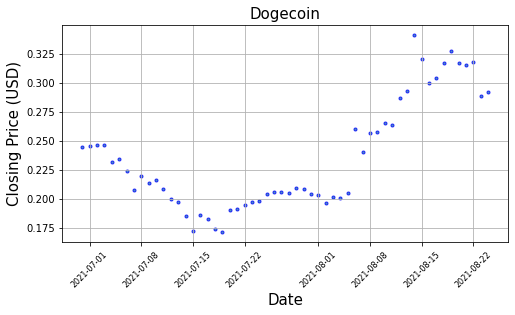

In [28]:
plt.scatter(doge["Date"], doge["Close"],marker=".", edgecolors="blue", alpha=.8)
plt.rcParams["figure.figsize"] = (8,4)
plt.title("Dogecoin",fontsize=15)
plt.ylabel("Closing Price (USD)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.grid()
plt.xticks(rotation=45,fontsize=8)




## Cardano

In [88]:
start = dt.datetime(2021,6,1)
end = dt.datetime(2021,8,24)

cardano = web.DataReader('ADA-USD', 'yahoo', start, end)
#data.to_csv('Resources/data/yahoo/UNI3-USD.csv')
   
cardano.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-31,1.779591,1.660549,1.738447,1.734753,4123980990,1.734753
2021-06-01,1.803849,1.719255,1.736103,1.752824,3453620094,1.752824
2021-06-02,1.888650,1.717762,1.754643,1.840471,3443770332,1.840471
2021-06-03,1.848485,1.609734,1.846715,1.710908,4583062567,1.710908
2021-06-04,1.783177,1.611715,1.709916,1.659009,2969362191,1.659009


In [89]:
#Reset Date Index 
cardano.reset_index(inplace=True,drop=False)

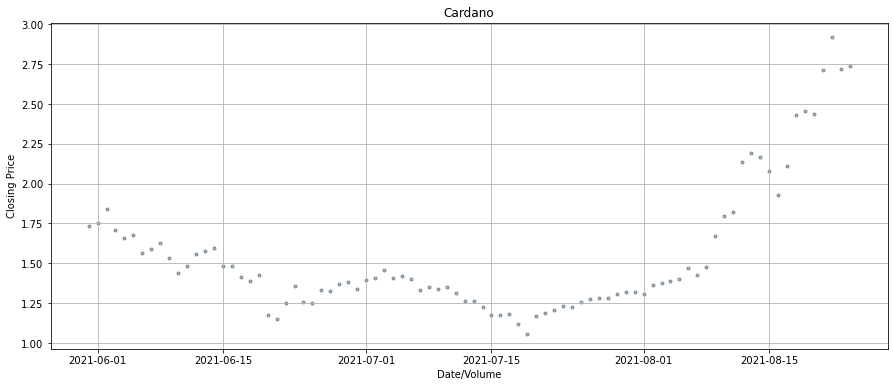

In [96]:
plt.scatter(cardano["Date"], cardano["Close"],marker=".", edgecolors="black", alpha=.4)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Cardano")
plt.ylabel("Closing Price")
plt.xlabel("Date/Volume")
plt.grid()

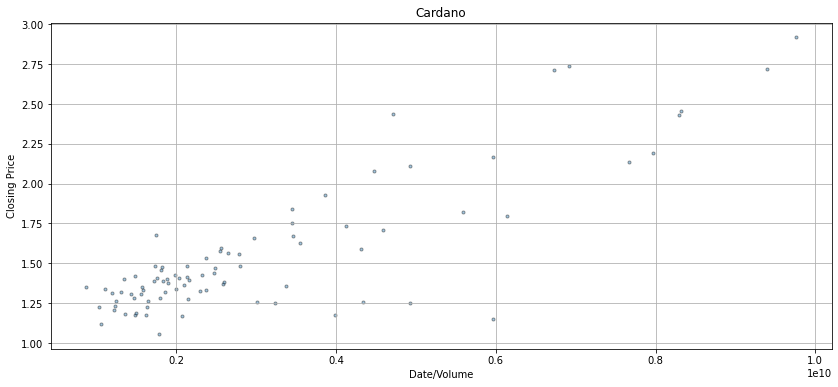

In [114]:
plt.scatter(cardano["Volume"], cardano["Close"],marker=".", edgecolors="black", alpha=.4)
plt.rcParams["figure.figsize"] = (12,6)
plt.title("Cardano")
plt.ylabel("Closing Price")
plt.xlabel("Date/Volume")
plt.grid()

## Bitcoin

In [102]:
start = dt.datetime(2021,5,1)
end = dt.datetime(2021,8,15)

bitcoin = web.DataReader('BTC-USD', 'yahoo', start, end)
#data.to_csv('Resources/data/yahoo/UNI3-USD.csv')
   
bitcoin.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-30,58448.339844,57052.273438,57714.664062,57828.050781,42836427360,57828.050781
2021-05-01,57902.593750,56141.906250,57825.863281,56631.078125,38177405335,56631.078125
2021-05-02,58973.308594,56590.871094,56620.273438,57200.292969,51713139031,57200.292969
2021-05-03,57214.179688,53191.425781,57214.179688,53333.539062,68564706967,53333.539062
2021-05-04,57911.363281,52969.054688,53252.164062,57424.007812,69241316747,57424.007812


In [103]:
#Reset Date Index 
bitcoin.reset_index(inplace=True,drop=False)

(array([0.0e+00, 2.0e+10, 4.0e+10, 6.0e+10, 8.0e+10, 1.0e+11, 1.2e+11,
        1.4e+11]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

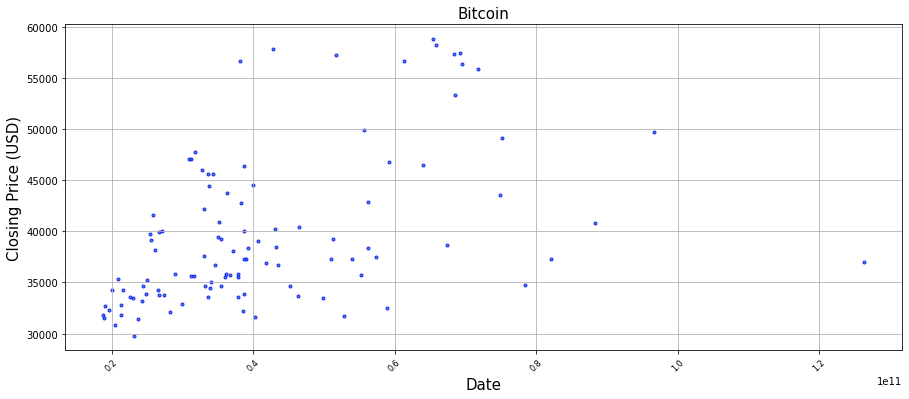

In [104]:
plt.scatter(bitcoin["Volume"], bitcoin["Close"],marker=".", edgecolors="blue", alpha=.8)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Bitcoin",fontsize=15)
plt.ylabel("Closing Price (USD)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.grid()
plt.xticks(rotation=45,fontsize=8)

## Stellar

In [11]:
start = dt.datetime(2021,5,15)
end = dt.datetime(2021,8,15)

stellar = web.DataReader('XLM-USD', 'yahoo', start, end)
stellar.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-14,0.740814,0.650728,0.666113,0.676241,4130301427,0.676241
2021-05-15,0.796471,0.663512,0.681264,0.714302,5094441207,0.714302
2021-05-16,0.711898,0.621145,0.711321,0.645601,3497099452,0.645601
2021-05-17,0.700613,0.635705,0.642654,0.647115,2692243772,0.647115
2021-05-18,0.656308,0.303509,0.646868,0.450427,4216540503,0.450427


In [12]:
#Reset Date Index 
stellar.reset_index(inplace=True,drop=False)

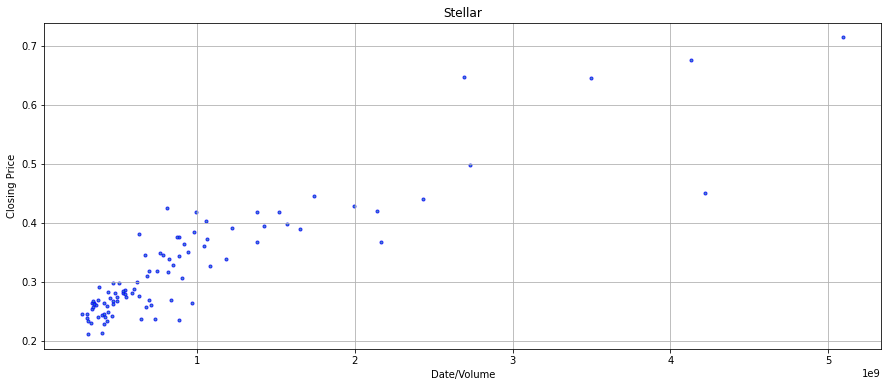

In [13]:
plt.scatter(test["Volume"], test["Close"],marker=".", edgecolors="blue", alpha=.8)
plt.rcParams["figure.figsize"] = (15,6)
plt.title("Stellar")
plt.ylabel("Closing Price")
plt.xlabel("Date/Volume")
plt.grid()

## Linear Regression

### Cardano

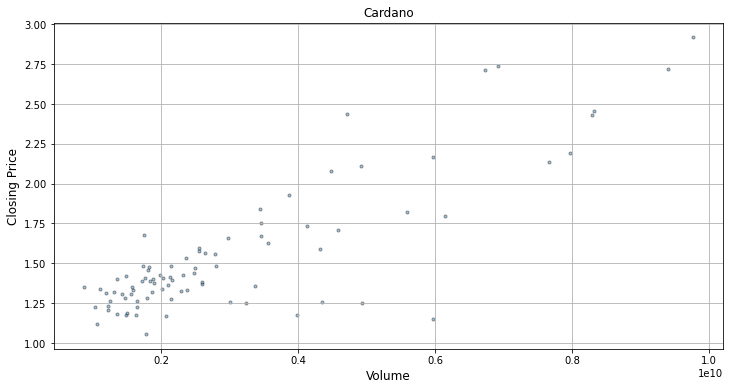

In [120]:
plt.scatter(cardano["Volume"], cardano["Close"],marker=".", edgecolors="black", alpha=.4)
plt.rcParams["figure.figsize"] = (12,6)
plt.title("Cardano",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.xlabel("Volume",fontsize=12)
plt.grid()

In [159]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = cardano.Volume.values.reshape(-1, 1)
y = cardano.Close.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
#X

Shape:  (86, 1) (86, 1)


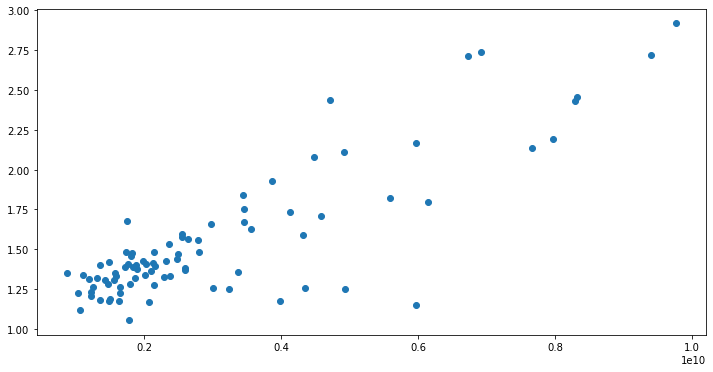

In [160]:
plt.scatter(X, y)

In [127]:
#from sklearn.datasets import make_regression
# n samples how many points we want, noise as in perfectly linear or not
#X, y = make_regression(n_samples=40, n_features=1, random_state=0, noise=8, bias=100.0)

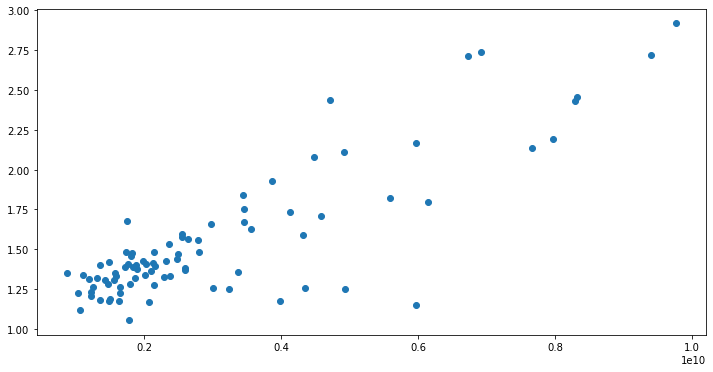

In [161]:
 # Plot the data
plt.scatter(X, y)


In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
model = LinearRegression()
model

LinearRegression()

In [164]:
model.fit(X,y)
print(model)

LinearRegression()


In [165]:
#98 is y intercept, 32 is slope
model.coef_, model.intercept_

(array([[1.6720487e-10]]), array([1.03542826]))

In [187]:
(1.6720487e-10)*1000000

0.00016720487

In [143]:
# y intercept: 1.03542826
# Weight coefficients: 1.6720487e-10

In [191]:
def prediction(x):
    return (1.6720487e-10*x) + 1.03542826
    

In [203]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Min X Value: [[870305644]]
Max X Value: [[9761269047]]


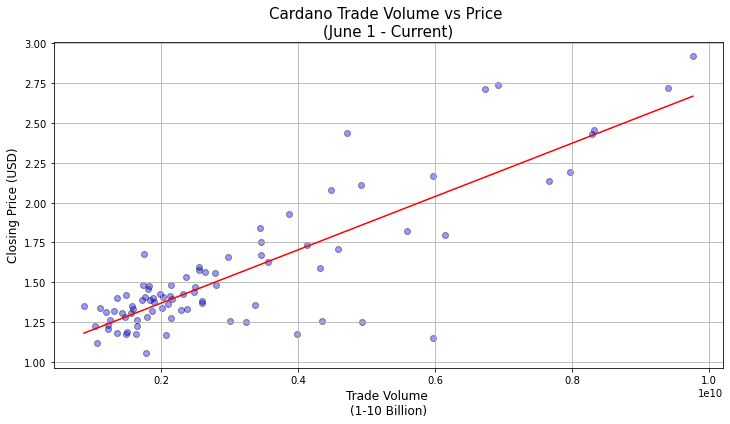

In [223]:
plt.scatter(X, y, c='blue', edgecolors="black", alpha=.4)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.rcParams["figure.figsize"] = (12,6)
plt.title("Cardano Trade Volume vs Price \n(June 1 - Current)",fontsize=15)
plt.ylabel("Closing Price (USD)",fontsize=12)
plt.xlabel("Trade Volume \n(1-10 Billion)", fontsize=12)
plt.grid()

In [205]:
prediction(3000000000)

1.53704287

### Stellar

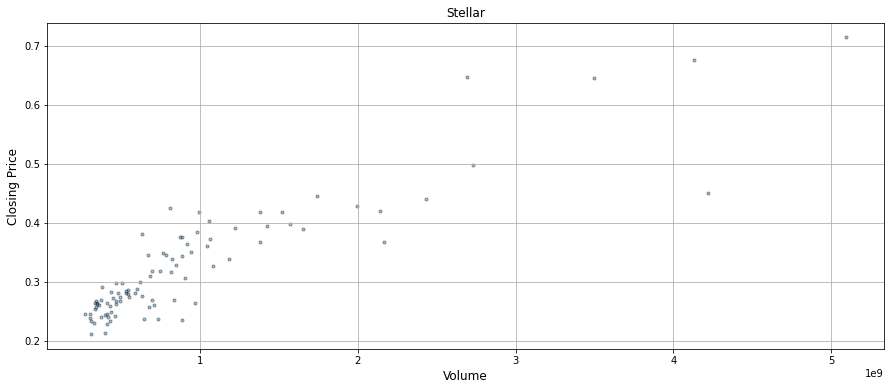

In [14]:
plt.scatter(stellar["Volume"], stellar["Close"],marker=".", edgecolors="black", alpha=.4)
plt.rcParams["figure.figsize"] = (12,6)
plt.title("Stellar",fontsize=12)
plt.ylabel("Closing Price",fontsize=12)
plt.xlabel("Volume",fontsize=12)
plt.grid()

In [16]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

R = stellar.Volume.values.reshape(-1, 1)
S = stellar.Close.values.reshape(-1, 1)

print("Shape: ", R.shape, S.shape)
#X

Shape:  (94, 1) (94, 1)


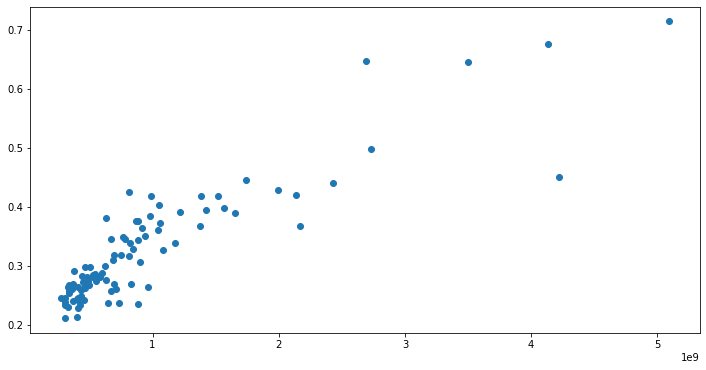

In [17]:
plt.scatter(R, S)

In [18]:
model_2 = LinearRegression()
model_2

LinearRegression()

In [19]:
model_2.fit(R,S)
print(model_2)

LinearRegression()


In [20]:
model_2.coef_, model_2.intercept_

(array([[9.93654002e-11]]), array([0.23069012]))

In [21]:
def prediction(x):
    return (9.93654002e-11*x) + 0.23069012
    

In [25]:
x_min = np.array([[R.min()]])
x_max = np.array([[R.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")
y_min_2 = model_2.predict(x_min)
y_max_2 = model_2.predict(x_max)

Min X Value: [[272218462]]
Max X Value: [[5094441207]]


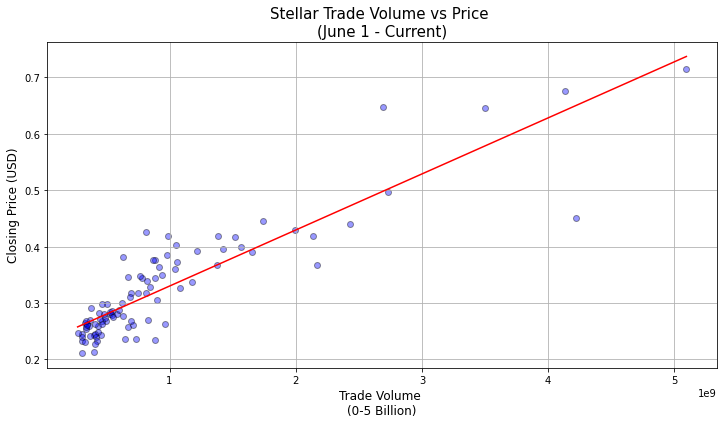

In [29]:
plt.scatter(R, S, c='blue', edgecolors="black", alpha=.4)
plt.plot([x_min[0], x_max[0]], [y_min_2[0], y_max_2[0]], c='red')
plt.rcParams["figure.figsize"] = (12,6)
plt.title("Stellar Trade Volume vs Price \n(June 1 - Current)",fontsize=15)
plt.ylabel("Closing Price (USD)",fontsize=12)
plt.xlabel("Trade Volume \n(0-5 Billion)", fontsize=12)
plt.grid()